**Importing the Libraries**

In [ ]:
import numpy as np
import cv2 as cv
import osS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import VGG16
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Flatten,Dense,MaxPool2D
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip new.zip

**Importing the Dataset**

In [ ]:
Categories = ["anemia" , "non-anemia"]              #the target categories of the datset

In [ ]:
data_dir = '/content/new'                           #dataset path

In [ ]:
data = []                                                         # iterating through the images path and appending the image and labels in data list
for category in Categories:
  path = os.path.join(data_dir,category)
  class_num = Categories.index(category)
  for img in os.listdir(path):
    img_arr = cv.imread(os.path.join(path,img))
    re = cv.resize(img_arr,(64,64))
    data.append([re,class_num])

In [ ]:
np.random.shuffle(data)   #shuffling the data to provide randomization

In [ ]:
x_data = []                    # iterating through the data list and append the images to x_data and labels to the y_data
y_data = []
for features,labels in data:
  x_data.append(features)
  y_data.append(labels)

In [ ]:
x_data = np.array(x_data)       #converting the images and labels into numpy array
y_data = np.array(y_data)

In [ ]:
print(f"shape of x data {x_data.shape}")
print(f"shape of y data {y_data.shape}")

shape of x data (4262, 64, 64, 3)
shape of y data (4262,)


In [ ]:
x_data = x_data/255       #normalizing the pixels of the images

**Plotting the number of categories in the target variable**

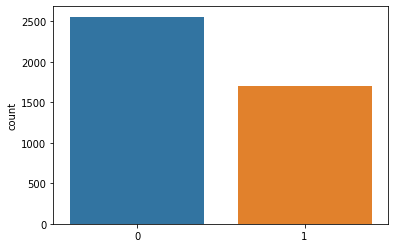

In [ ]:
sns.countplot(y_data)
plt.show()

**Plotting the random images from the dataset**

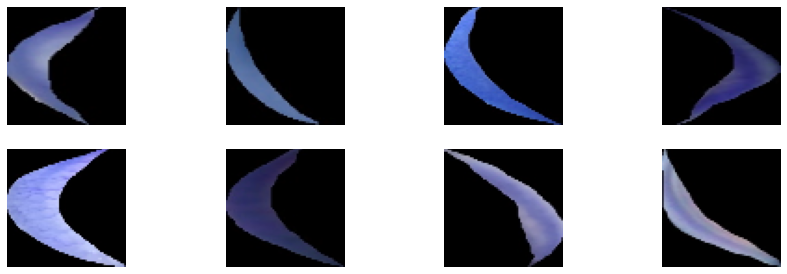

In [ ]:
plt.figure(figsize=(15,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.imshow(x_data[i],cmap='gray')
  plt.axis("off")

**Splitting the datset into Train and test**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=22)

In [ ]:
print(f"shape of x train {x_train.shape}")
print(f"shape of y train {y_train.shape}")
print(f"shape of x test {x_test.shape}")
print(f"shape of y train {y_test.shape}")

shape of x train (3409, 64, 64, 3)
shape of y train (3409,)
shape of x test (853, 64, 64, 3)
shape of y train (853,)


**Approach 1 using Convolutional Neural Networks**

In [ ]:
model = Sequential()                      # creating a sequential cnn model
model.add(Conv2D(100 , (3,3) , input_shape=(64,64,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Conv2D(150 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100 , activation="relu"))
model.add(Dense(2 , activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy" , metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
171/171 [==============================] - 13s 13ms/step - loss: 0.6662 - accuracy: 0.6101 - val_loss: 0.6646 - val_accuracy: 0.6131
Epoch 2/20
171/171 [==============================] - 2s 11ms/step - loss: 0.6196 - accuracy: 0.6676 - val_loss: 0.6338 - val_accuracy: 0.6483
Epoch 3/20
171/171 [==============================] - 2s 9ms/step - loss: 0.5565 - accuracy: 0.7064 - val_loss: 0.5714 - val_accuracy: 0.7151
Epoch 4/20
171/171 [==============================] - 2s 9ms/step - loss: 0.4580 - accuracy: 0.7844 - val_loss: 0.5262 - val_accuracy: 0.7280
Epoch 5/20
171/171 [==============================] - 2s 9ms/step - loss: 0.3195 - accuracy: 0.8648 - val_loss: 0.5118 - val_accuracy: 0.7749
Epoch 6/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1935 - accuracy: 0.9249 - val_loss: 0.4418 - val_accuracy: 0.8429
Epoch 7/20
171/171 [==============================] - 2s 9ms/step - loss: 0.1213 - accuracy: 0.9542 - val_loss: 0.4440 - val_accuracy: 0.8804
Epo

In [ ]:
model.summary()                #summary of the CNN model used for the classification

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 150)       135150    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 150)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29400)             0         
                                                                 
 dense (Dense)               (None, 100)               2

In [ ]:
y_pred = model.predict(x_test)       #predicting the values using the testing data

27/27 [==============================] - 1s 12ms/step


In [ ]:
print("the accuracy score for the model is " ,accuracy_score(y_test,y_pred.argmax(axis=1)))   

the accuracy score for the model is  0.8933177022274326


In [ ]:
print(classification_report(y_test,y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       485
           1       0.92      0.82      0.87       368

    accuracy                           0.89       853
   macro avg       0.90      0.88      0.89       853
weighted avg       0.90      0.89      0.89       853



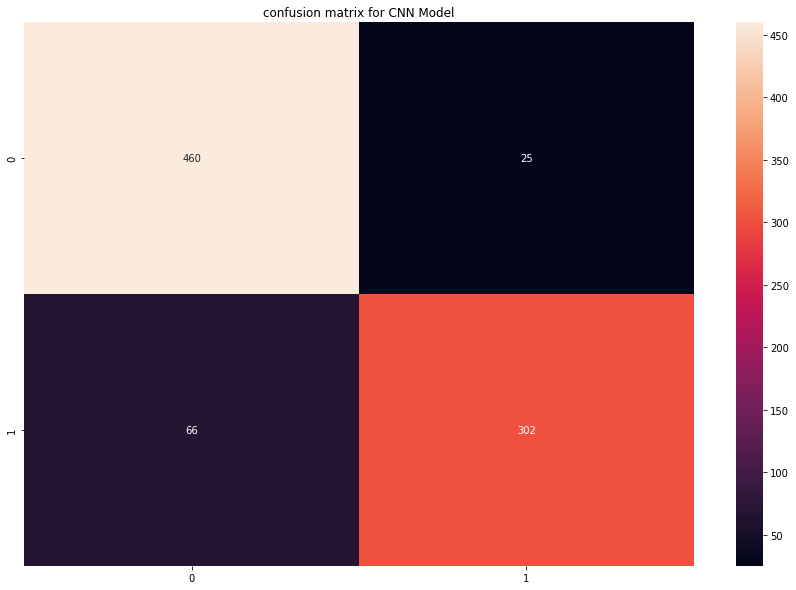

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for CNN Model")
plt.show()

In [ ]:
predictions = model.predict(x_test[0].reshape(1,64,64,3))

1/1 [==============================] - 0s 23ms/step


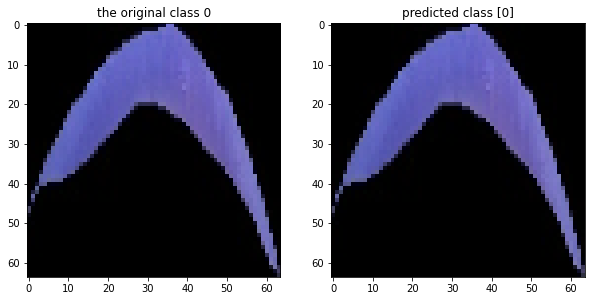

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()

**Approach 2 using the VGG16 Architecture**

In [ ]:
vgg_model = Sequential()     #creating a sequential VGG model

In [ ]:
vgg = VGG16(include_top=False , input_shape=(64,64,3) , classes=2, classifier_activation="sigmoid")

In [ ]:
vgg_model.add(vgg)
vgg_model.add(Flatten())
vgg_model.add(Dense(2, activation="sigmoid"))

In [ ]:
vgg_model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history_vgg = vgg_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=16,epochs=20)

Epoch 1/20
214/214 [==============================] - 15s 42ms/step - loss: 0.7354 - accuracy: 0.5846 - val_loss: 0.6988 - val_accuracy: 0.5686
Epoch 2/20
214/214 [==============================] - 8s 36ms/step - loss: 0.6734 - accuracy: 0.6072 - val_loss: 0.7373 - val_accuracy: 0.5686
Epoch 3/20
214/214 [==============================] - 8s 36ms/step - loss: 0.6763 - accuracy: 0.6022 - val_loss: 0.6947 - val_accuracy: 0.5686
Epoch 4/20
214/214 [==============================] - 8s 37ms/step - loss: 0.6719 - accuracy: 0.6034 - val_loss: 0.6932 - val_accuracy: 0.5686
Epoch 5/20
214/214 [==============================] - 8s 36ms/step - loss: 0.6785 - accuracy: 0.6052 - val_loss: 0.6860 - val_accuracy: 0.5686
Epoch 6/20
214/214 [==============================] - 8s 35ms/step - loss: 0.6755 - accuracy: 0.6081 - val_loss: 0.6838 - val_accuracy: 0.5686
Epoch 7/20
214/214 [==============================] - 8s 36ms/step - loss: 0.6711 - accuracy: 0.6081 - val_loss: 0.6847 - val_accuracy: 0.568

In [ ]:
vgg_model.summary()        #summary of the VGG model used for the classification

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 4098      
                                                                 
Total params: 14,718,786
Trainable params: 14,718,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_vgg = vgg_model.predict(x_test)

27/27 [==============================] - 2s 30ms/step


In [ ]:
print("the accuracy score for the model is " ,accuracy_score(y_test,y_pred_vgg.argmax(axis=1)))

the accuracy score for the model is  0.5685814771395076


In [ ]:
print(classification_report(y_test,y_pred_vgg.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72       485
           1       0.00      0.00      0.00       368

    accuracy                           0.57       853
   macro avg       0.28      0.50      0.36       853
weighted avg       0.32      0.57      0.41       853



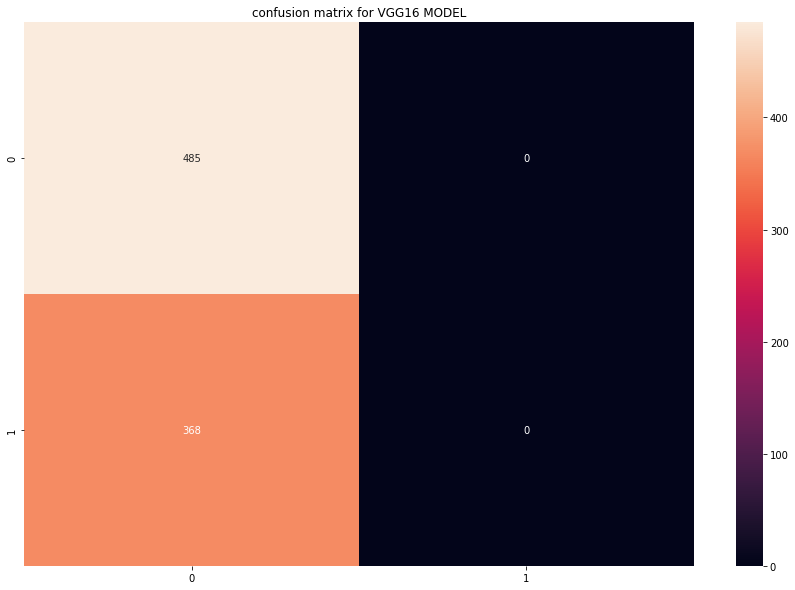

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred_vgg.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for VGG16 MODEL")
plt.show()

1/1 [==============================] - 0s 20ms/step


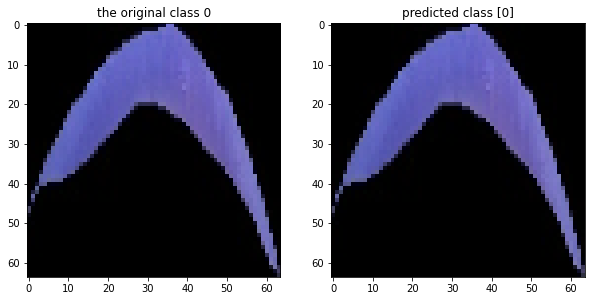

In [ ]:
predictions = vgg_model.predict(x_test[0].reshape(1,64,64,3))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()

**Approach 3 using the ResNet Architecture**

In [ ]:
resnet = ResNet50(include_top=False , input_shape=(64,64,3) , classes=2)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model = Sequential()
resnet_model.add(resnet)
resnet_model.add(Flatten())
resnet_model.add(Dense(50 , activation="relu"))
resnet_model.add(Dense(2 , activation="sigmoid"))

In [ ]:
resnet_model.compile(optimizer="adam" , loss = "sparse_categorical_crossentropy" , metrics = ['accuracy'])

In [ ]:
history_resnet = resnet_model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=20)

Epoch 1/20
171/171 [==============================] - 46s 67ms/step - loss: 0.7328 - accuracy: 0.5946 - val_loss: 0.6875 - val_accuracy: 0.5686
Epoch 2/20
171/171 [==============================] - 9s 53ms/step - loss: 0.6776 - accuracy: 0.6125 - val_loss: 0.7200 - val_accuracy: 0.5686
Epoch 3/20
171/171 [==============================] - 8s 49ms/step - loss: 0.6559 - accuracy: 0.6204 - val_loss: 0.7372 - val_accuracy: 0.5686
Epoch 4/20
171/171 [==============================] - 11s 66ms/step - loss: 0.6632 - accuracy: 0.6113 - val_loss: 0.7589 - val_accuracy: 0.5686
Epoch 5/20
171/171 [==============================] - 9s 54ms/step - loss: 0.6283 - accuracy: 0.6145 - val_loss: 0.6842 - val_accuracy: 0.5686
Epoch 6/20
171/171 [==============================] - 9s 53ms/step - loss: 0.6239 - accuracy: 0.6216 - val_loss: 0.6666 - val_accuracy: 0.5756
Epoch 7/20
171/171 [==============================] - 9s 54ms/step - loss: 0.5945 - accuracy: 0.6544 - val_loss: 0.6513 - val_accuracy: 0.60

In [ ]:
resnet_model.summary()             #summary of the resnet model used for the classification

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 50)                409650    
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 23,997,464
Trainable params: 23,944,344
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
y_pred_resnet = resnet_model.predict(x_test)

27/27 [==============================] - 3s 28ms/step


In [ ]:
print("the accuracy score for the model is " ,accuracy_score(y_test,y_pred_resnet.argmax(axis=1)))

the accuracy score for the model is  0.7444314185228605


In [ ]:
print(classification_report(y_test,y_pred_resnet.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       485
           1       0.65      0.90      0.75       368

    accuracy                           0.74       853
   macro avg       0.77      0.76      0.74       853
weighted avg       0.79      0.74      0.74       853



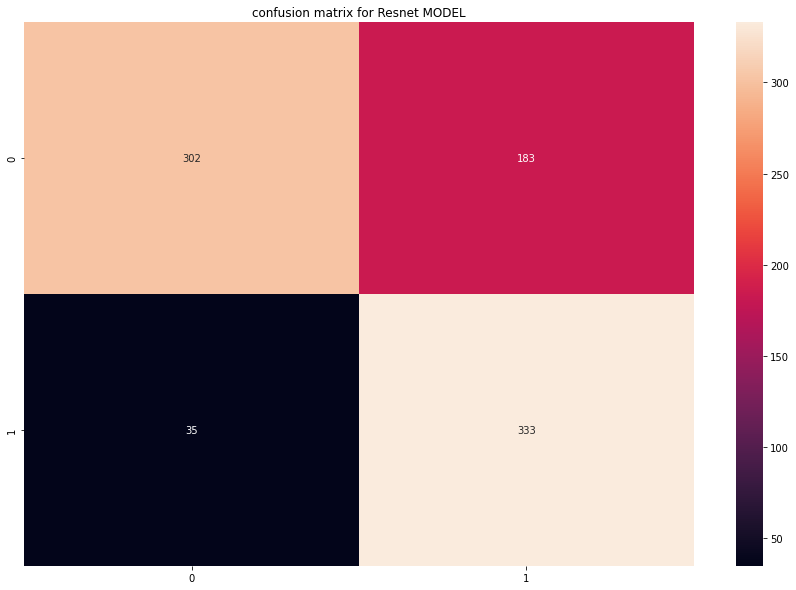

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred_resnet.argmax(axis=1)),annot=True,fmt='g')
plt.title("confusion matrix for Resnet MODEL")
plt.show()

1/1 [==============================] - 0s 38ms/step


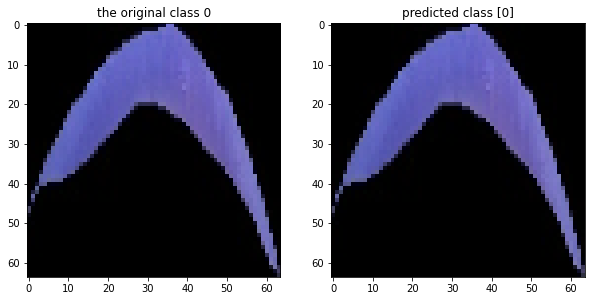

In [ ]:
predictions = resnet_model.predict(x_test[0].reshape(1,64,64,3))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions.argmax(axis=1)}")
plt.show()

**Approach 4 Machine Learning using the XGB Classifier**

In [ ]:
x_train_reshaped = x_train.reshape(x_train.shape[0],-1)#reshaping the images to (number of images, height*width*channels) as ML algorithms require data in this format

In [ ]:
xgb_clf = xgb.XGBClassifier()    #initialising the xgboost model

In [ ]:
xgb_clf.fit(x_train_reshaped,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
x_test_reshaped = x_test.reshape(x_test.shape[0],-1)

In [ ]:
y_pred_xgb = xgb_clf.predict(x_test_reshaped)

In [ ]:
print(f"the accuracy of the xgb classifier is {accuracy_score(y_pred_xgb,y_test)}")

the accuracy of the xgb classifier is 0.8991793669402111


In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       485
           1       0.94      0.82      0.88       368

    accuracy                           0.90       853
   macro avg       0.91      0.89      0.90       853
weighted avg       0.90      0.90      0.90       853



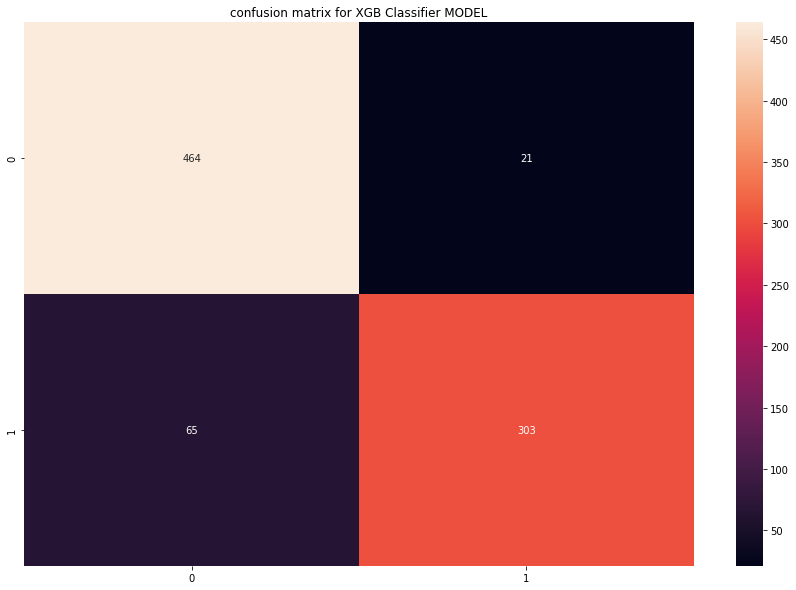

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='g')
plt.title("confusion matrix for XGB Classifier MODEL")
plt.show()

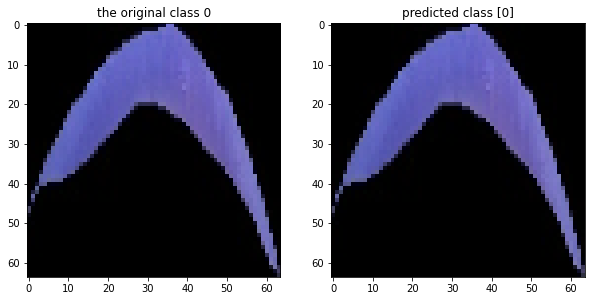

In [ ]:
predictions = xgb_clf.predict(x_test[0].reshape(1,-1))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions}")
plt.show()

**Approach 5 using Logistic Regression**

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train_reshaped,y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(x_test_reshaped)

In [ ]:
print(f"the accuracy of the xgb classifier is {accuracy_score(y_pred_lr,y_test)}")

the accuracy of the xgb classifier is 0.8558030480656507


In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       485
           1       0.86      0.80      0.83       368

    accuracy                           0.86       853
   macro avg       0.86      0.85      0.85       853
weighted avg       0.86      0.86      0.86       853



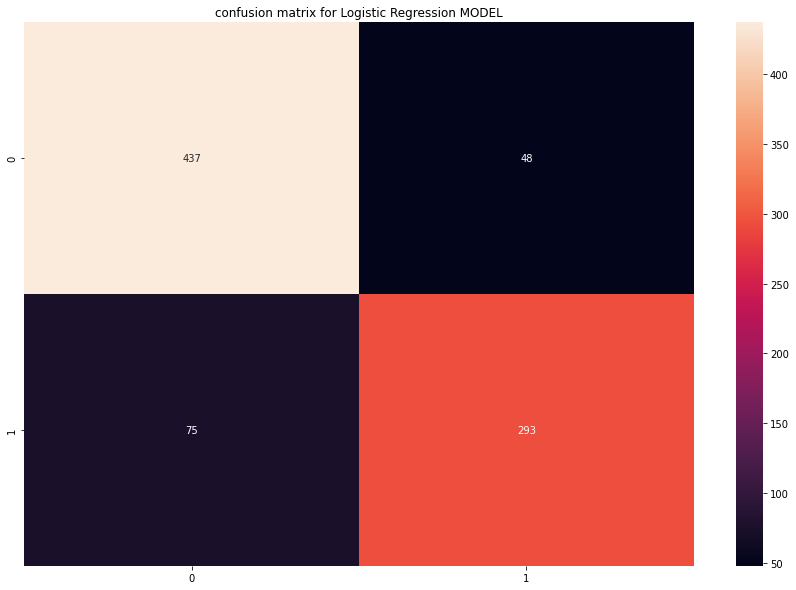

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='g')
plt.title("confusion matrix for Logistic Regression MODEL")
plt.show()

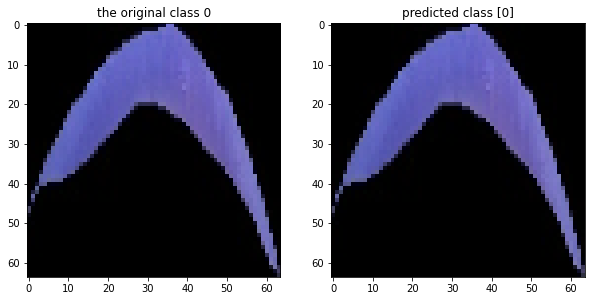

In [ ]:
predictions = lr.predict(x_test[0].reshape(1,-1))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.title(f"the original class {y_test[0]}")
plt.subplot(1,2,2)
plt.imshow(x_test[0])
plt.title(f"predicted class {predictions}")
plt.show()

**Conclusion**

**1. Convolutional Neural Networks :-** CNN was able to perform well on this dataset as it achieved an accuracy of 89.3%. The precision of CNN is 0.87 and the recall value is 0.92.

**2. VGG16 :-** VGG model was able to perform well on this dataset. It was able to achieve only an accuracy of 56%. The precision value for VGG is 0.57 and the recall value is 0 meaning it is not able to remember the patterns learned from the images.

**3. Resnet :-** Resnet performed well comparatively to VGG. It was able to achieve an accuracy of 74%. The precision value it is able to achieve is 0.9 which is great and it has a recall value of 0.65.

**4. XGB Classifier :-** XGB was the best model for this dataset. It was able to achieve an accuracy of almost 90%(89.9%). It was also able to achieve a great recall and precision value of 0.88 and 0.94.

**5. Logistic Regression :-** Logistic Regression performed better than vgg and resnet in some cases. It was able to achieve an accuracy of 85.5%. It has a precision value of 0.85 and recall value of 0.86